In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser

In [2]:
coffee_sales_df = pd.read_csv('index.csv')
coffee_sales_df.head(20)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [3]:
coffee_sales_df.rename(columns={'money':'UAH'},inplace=True)
coffee_sales_df.head()

,date,datetime,cash_type,card,UAH,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
coffee_sales_df.describe()

,UAH
count,896.000000
mean,34.143906
std,4.573951
min,23.020000
25%,28.900000
50%,34.500000
75%,37.720000
max,40.000000


In [5]:
coffee_sales_df.groupby('cash_type').agg({'cash_type':'count'})

,cash_type
cash_type,
card,807
cash,89


In [6]:
cash_type_values = np.array(coffee_sales_df.cash_type.value_counts())
cash_type_values

array([807,  89], dtype=int64)

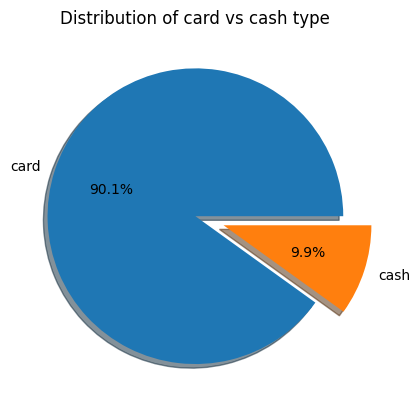

In [7]:
plt.pie(cash_type_values,labels=['card','cash'],autopct='%1.1f%%',explode=(0,0.2),shadow=True)
plt.title('Distribution of card vs cash type')
plt.savefig('CardType_Distribution.png')
plt.show()

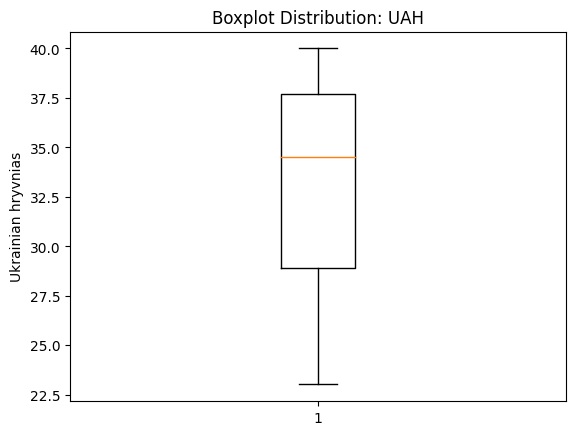

In [8]:
plt.boxplot(coffee_sales_df.UAH)
plt.title('Boxplot Distribution: UAH')
plt.ylabel('Ukrainian hryvnias')
plt.savefig('UAH_Boxplot.png')
plt.show()

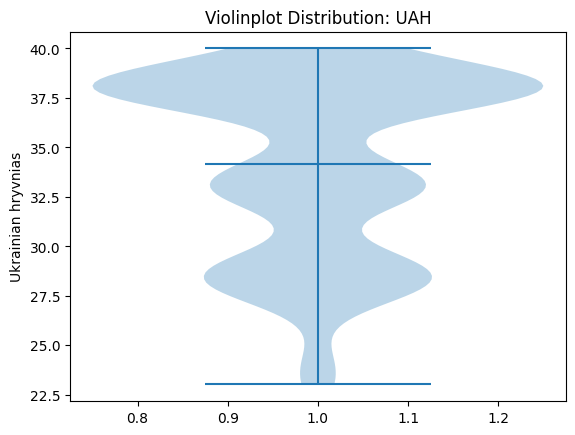

In [9]:
plt.violinplot(coffee_sales_df.UAH,showmedians=False,showmeans=True)
plt.title('Violinplot Distribution: UAH')
plt.ylabel('Ukrainian hryvnias')
plt.savefig('UAH_Violinplot.png')
plt.show()

In [10]:
coffee_names = coffee_sales_df.coffee_name.value_counts()
coffee_names

coffee_name
Americano with Milk    203
Latte                  187
Cappuccino             164
Americano              133
Cortado                 85
Hot Chocolate           63
Espresso                35
Cocoa                   26
Name: count, dtype: int64

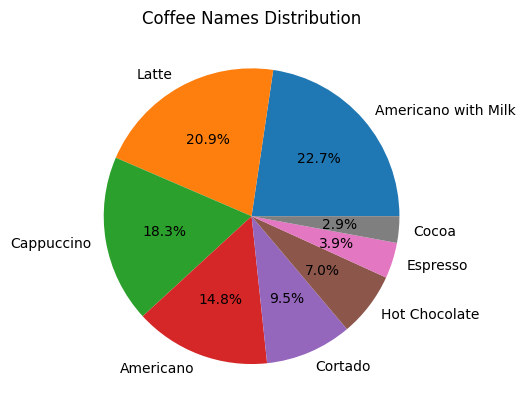

In [11]:
plt.pie(np.array(coffee_names),labels=coffee_names.index,autopct='%1.1f%%')
plt.title('Coffee Names Distribution')
plt.savefig('Coffee_Names_Distribution.png')
plt.show()

In [12]:
coffee_sales_df.head()

,date,datetime,cash_type,card,UAH,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [13]:
# TOP 3 coffee sales
coffee_sales_df.groupby('coffee_name').agg({'UAH':'sum'}).sort_values('UAH',ascending=False).head(3)

,UAH
coffee_name,
Latte,7151.62
Americano with Milk,6738.14
Cappuccino,6253.50


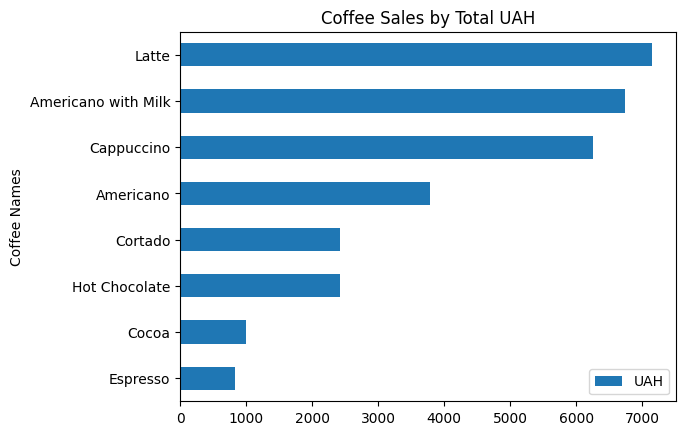

In [14]:
# Find TOP coffee sales
coffee_sales_df.groupby('coffee_name').agg({'UAH':'sum'}).sort_values('UAH',ascending=True).plot(kind='barh')
plt.title('Coffee Sales by Total UAH')
plt.ylabel('Coffee Names')
plt.savefig('Coffee_Sales_by_Total_UAH.png')
plt.show()

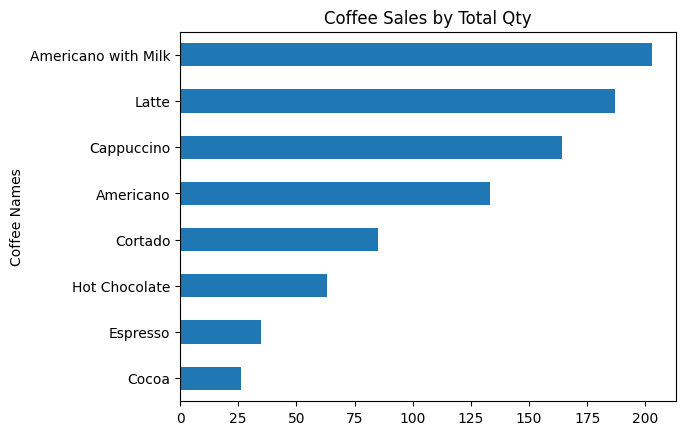

In [15]:
# Find TOP coffee sale quantity
coffee_sales_df.coffee_name.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Coffee Sales by Total Qty')
plt.ylabel('Coffee Names')
plt.savefig('Coffee_Sales_by_Total_Qty.png')
plt.show()

In [16]:
# Find time of day with hot sales (time range with inteval of an hour vs number of sales)
coffee_sales_df['nearestHour'] = coffee_sales_df.datetime.apply(lambda s: parser.parse(s).hour)
coffee_sales_df.head()

,date,datetime,cash_type,card,UAH,coffee_name,nearestHour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13


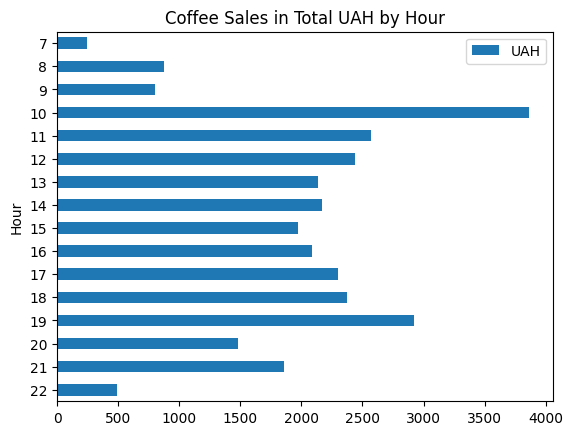

In [17]:
coffee_sales_df.groupby('nearestHour').agg({'UAH':'sum'}).sort_index(ascending=False).plot(kind='barh')
plt.title('Coffee Sales in Total UAH by Hour')
plt.ylabel('Hour')
plt.savefig('Coffee_Sales_UAH_by_Hour.png')
plt.show()

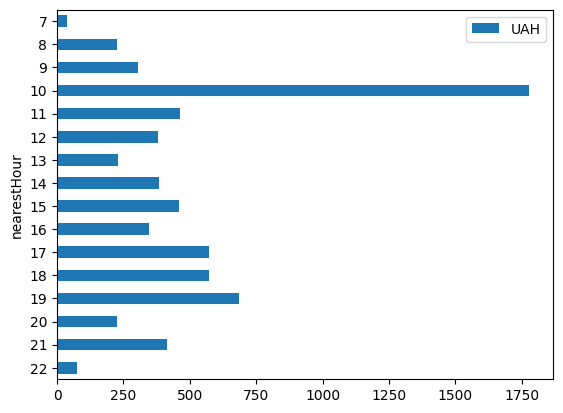

In [18]:
# Find each coffee names by hour
coffee_sales_df[coffee_sales_df['coffee_name']=='Latte'].groupby('nearestHour').agg({'UAH':'sum'}).sort_index(ascending=False).plot(kind='barh')
plt.show()

In [19]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2

,a,b,c,d
0,0.691495,0.075413,0.167869,0.875811
1,0.645351,0.504849,0.635826,0.668306
2,0.813822,0.949731,0.231257,0.199621
3,0.350553,0.269536,0.246912,0.174725
4,0.362178,0.758564,0.835726,0.371656
5,0.279364,0.808973,0.206676,0.407882
6,0.448684,0.596476,0.664360,0.346224
7,0.276911,0.462847,0.748244,0.683628
8,0.096850,0.443423,0.686022,0.452545
9,0.297339,0.798592,0.031622,0.789188


In [20]:
coffee_name_df = pd.DataFrame(index=np.arange(7,23),columns=np.array(coffee_sales_df.coffee_name.value_counts().index))
coffee_name_df.fillna(value=0,inplace=True)
coffee_name_df

,Americano with Milk,Latte,Cappuccino,Americano,Cortado,Hot Chocolate,Espresso,Cocoa
7,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0


In [21]:
#coffee_name_df.loc[[10],['Latte']] +=1

In [22]:
for i, row in coffee_sales_df.iterrows():
    #print(row['coffee_name'],row['nearestHour'])
    coffee_name_df.loc[[row['nearestHour']],[row['coffee_name']]] += 1

coffee_name_df

,Americano with Milk,Latte,Cappuccino,Americano,Cortado,Hot Chocolate,Espresso,Cocoa
7,2,1,0,4,1,0,0,0
8,4,6,7,5,4,0,0,0
9,7,8,1,3,3,0,1,1
10,22,46,9,16,7,5,2,3
11,16,12,13,14,12,6,3,1
12,20,10,13,13,7,3,5,2
13,13,6,10,18,11,4,3,1
14,17,10,13,13,6,1,3,2
15,13,12,7,14,3,6,4,0
16,12,9,10,10,11,4,4,3


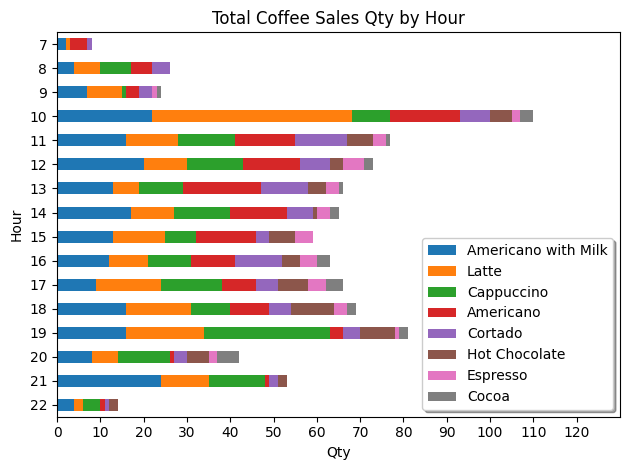

In [23]:
coffee_name_df.sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.title('Total Coffee Sales Qty by Hour')
plt.ylabel('Hour')
plt.xlabel('Qty')
plt.xticks(np.arange(0,130,10))
plt.xlim(0,130)
plt.tight_layout()
plt.legend(fancybox=True,shadow=True)
plt.savefig('Total_Coffee_Sales_Qty_by_Hour.png')
plt.show()

In [24]:
# Plot average weekly sales
coffee_sales_df['week'] = coffee_sales_df.date.apply(lambda s: parser.parse(s).isocalendar().week)
coffee_sales_df.head()

,date,datetime,cash_type,card,UAH,coffee_name,nearestHour,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,9
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,9
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,9
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,9
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,9


In [43]:
coffee_sales_df.groupby('week').agg({'UAH':'sum'}).describe()

,UAH
count,18.000000
mean,1699.607778
std,514.396766
min,890.180000
25%,1333.875000
50%,1685.900000
75%,1893.690000
max,2811.800000


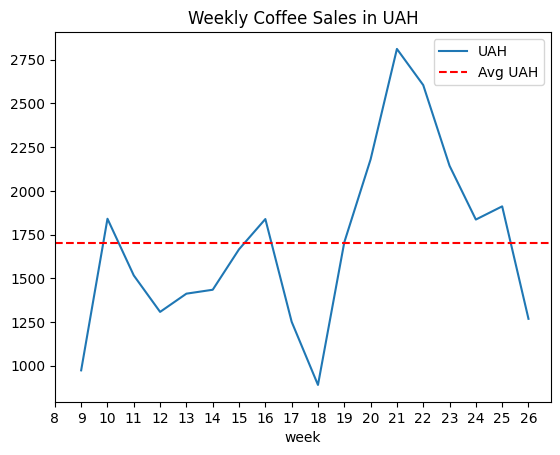

In [53]:
coffee_sales_df.groupby('week').agg({'UAH':'sum'}).plot(kind='line',legend=False)
plt.axhline(np.nanmean(coffee_sales_df.groupby('week').agg({'UAH':'sum'})),color='red',linestyle='--',label='Avg UAH')
plt.title('Weekly Coffee Sales in UAH')
plt.xticks(np.arange(8,27,1))
plt.legend()
plt.savefig('Weekly_Coffee_Sales_in_UAH.png')
plt.show()

In [26]:
coffee_sales_df.groupby('week').agg({'UAH':'sum'}).head()

,UAH
week,
9,973.5
10,1840.5
11,1516.3
12,1307.8
13,1412.1


In [27]:
# Plot overall growth
coffee_sales_week = coffee_sales_df.groupby('week').agg({'UAH':'sum'})
n = coffee_sales_week['UAH'][9]
for i,row in coffee_sales_week.iterrows():
    if i == 9: continue
    else:
        n += row['UAH']
        row['UAH'] = n
coffee_sales_week.head()

,UAH
week,
9,973.5
10,2814.0
11,4330.3
12,5638.1
13,7050.2


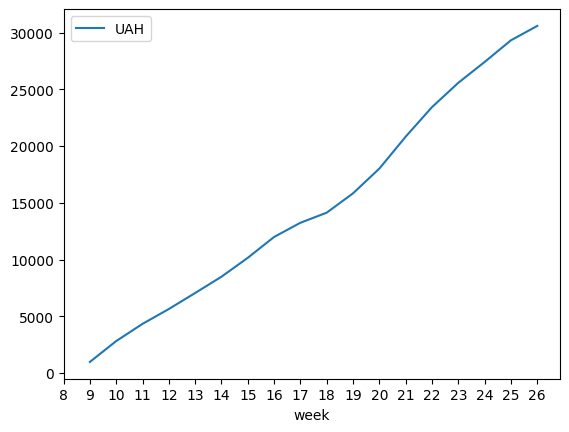

In [28]:
coffee_sales_week.plot(kind='line')
plt.xticks(np.arange(8,27,1))
plt.show()

In [29]:
# Which day of the week has most sales
coffee_sales_dayOfWeek = pd.DataFrame(index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],columns=np.array(coffee_sales_df.coffee_name.value_counts().index))
coffee_sales_dayOfWeek.fillna(value=0,inplace=True)
coffee_sales_dayOfWeek

,Americano with Milk,Latte,Cappuccino,Americano,Cortado,Hot Chocolate,Espresso,Cocoa
Mon,0,0,0,0,0,0,0,0
Tue,0,0,0,0,0,0,0,0
Wed,0,0,0,0,0,0,0,0
Thu,0,0,0,0,0,0,0,0
Fri,0,0,0,0,0,0,0,0
Sat,0,0,0,0,0,0,0,0
Sun,0,0,0,0,0,0,0,0


In [30]:
coffee_sales_df['dayOfWeek'] = coffee_sales_df.date.apply(lambda s: parser.parse(s).strftime('%a'))
coffee_sales_df.head(10)

,date,datetime,cash_type,card,UAH,coffee_name,nearestHour,week,dayOfWeek
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,9,Fri
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,9,Fri
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,9,Fri
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,9,Fri
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,9,Fri
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,15,9,Fri
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,16,9,Fri
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,18,9,Fri
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,19,9,Fri
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,19,9,Fri


In [31]:
for i,row in coffee_sales_df.iterrows():
    coffee_sales_dayOfWeek.loc[[row['dayOfWeek']],[row['coffee_name']]] += 1
coffee_sales_dayOfWeek

,Americano with Milk,Latte,Cappuccino,Americano,Cortado,Hot Chocolate,Espresso,Cocoa
Mon,28,24,26,30,11,3,3,2
Tue,31,25,24,18,15,14,1,8
Wed,21,21,22,18,14,8,10,4
Thu,27,40,24,18,11,10,7,0
Fri,25,28,19,20,13,9,5,5
Sat,42,21,27,14,8,7,2,6
Sun,29,28,22,15,13,12,7,1


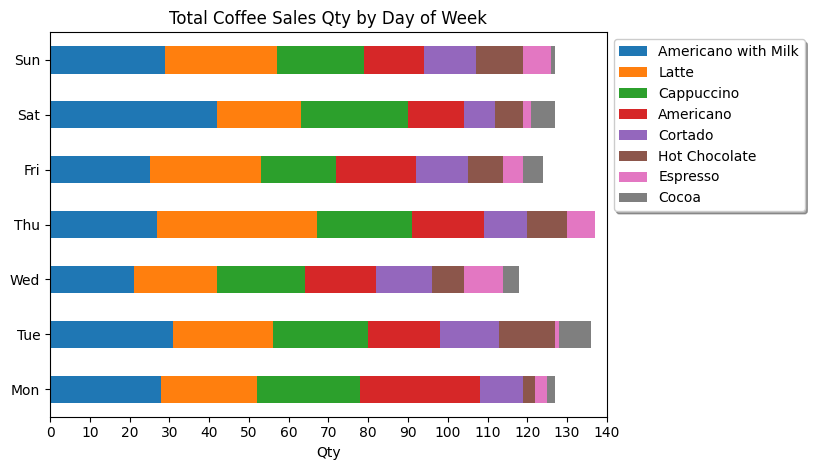

In [32]:
coffee_sales_dayOfWeek.plot(kind='barh',stacked=True)
plt.title('Total Coffee Sales Qty by Day of Week')
plt.xlabel('Qty')
plt.xticks(np.arange(0,150,10))
plt.xlim(0,140)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1),fancybox=True,shadow=True)
plt.savefig('Total_Coffee_Sales_Qty_by_Day_of_Week.png',bbox_inches='tight')
plt.show()

In [33]:
# Cash type by hour
coffee_cash_hour = pd.DataFrame(index=np.arange(7,23),columns=['card','cash'])
coffee_cash_hour.fillna(value=0,inplace=True)
coffee_cash_hour

,card,cash
7,0,0
8,0,0
9,0,0
10,0,0
11,0,0
12,0,0
13,0,0
14,0,0
15,0,0
16,0,0


In [34]:
for i,row in coffee_sales_df.iterrows():
    coffee_cash_hour.loc[[row['nearestHour']],[row['cash_type']]] += 1
coffee_cash_hour

,card,cash
7,5,3
8,26,0
9,19,5
10,89,21
11,66,11
12,65,8
13,64,2
14,62,3
15,50,9
16,59,4


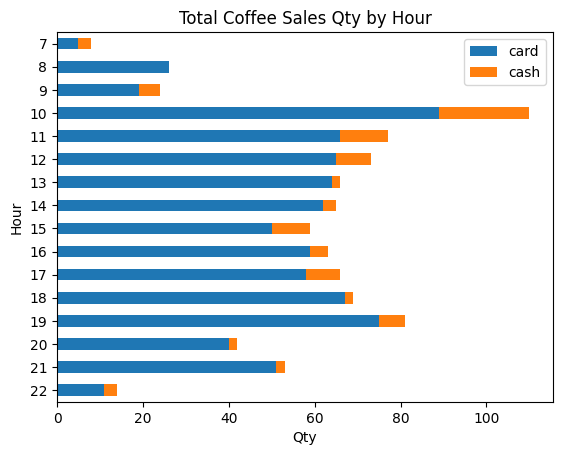

In [35]:
coffee_cash_hour.sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.title('Total Coffee Sales Qty by Hour')
plt.xlabel('Qty')
plt.ylabel('Hour')
plt.savefig('Total_Coffee_Sales_Qty_by_Hour_CashType.png')
plt.show()

In [36]:
# Which card bought the most coffee
coffee_sales_df.groupby('card').agg({'UAH':'sum'}).sort_values('UAH',ascending=False).head(5)

,UAH
card,
ANON-0000-0000-0012,2297.34
ANON-0000-0000-0009,1912.42
ANON-0000-0000-0097,681.88
ANON-0000-0000-0001,646.14
ANON-0000-0000-0003,628.94


In [37]:
# Spending habits of a particular card e.g top spender
coffee_sales_top_spender = coffee_sales_df[coffee_sales_df['card'] == 'ANON-0000-0000-0012']
coffee_sales_top_spender.head()

,date,datetime,cash_type,card,UAH,coffee_name,nearestHour,week,dayOfWeek
14,2024-03-02,2024-03-02 11:59:45.484,card,ANON-0000-0000-0012,33.8,Americano with Milk,11,9,Sat
21,2024-03-03,2024-03-03 12:26:56.098,card,ANON-0000-0000-0012,28.9,Americano,12,9,Sun
30,2024-03-04,2024-03-04 11:05:16.184,card,ANON-0000-0000-0012,33.8,Americano with Milk,11,10,Mon
42,2024-03-06,2024-03-06 13:24:07.667,card,ANON-0000-0000-0012,28.9,Americano,13,10,Wed
43,2024-03-06,2024-03-06 13:25:14.351,card,ANON-0000-0000-0012,28.9,Cortado,13,10,Wed


In [38]:
coffee_name_df = pd.DataFrame(index=np.arange(7,23),columns=np.array(coffee_sales_top_spender.coffee_name.value_counts().index))
coffee_name_df.fillna(value=0,inplace=True)
coffee_name_df

,Americano,Americano with Milk,Cortado,Cappuccino,Espresso
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,0
11,0,0,0,0,0
12,0,0,0,0,0
13,0,0,0,0,0
14,0,0,0,0,0
15,0,0,0,0,0
16,0,0,0,0,0


In [39]:
for i,row in coffee_sales_top_spender.iterrows():
    coffee_name_df.loc[[row['nearestHour']],[row['coffee_name']]] += 1
coffee_name_df

,Americano,Americano with Milk,Cortado,Cappuccino,Espresso
7,0,0,0,0,0
8,3,1,0,0,0
9,0,0,0,0,0
10,1,1,1,1,0
11,6,2,1,0,1
12,4,0,1,2,0
13,3,2,2,1,0
14,6,1,1,1,0
15,2,1,0,0,1
16,1,1,2,2,0


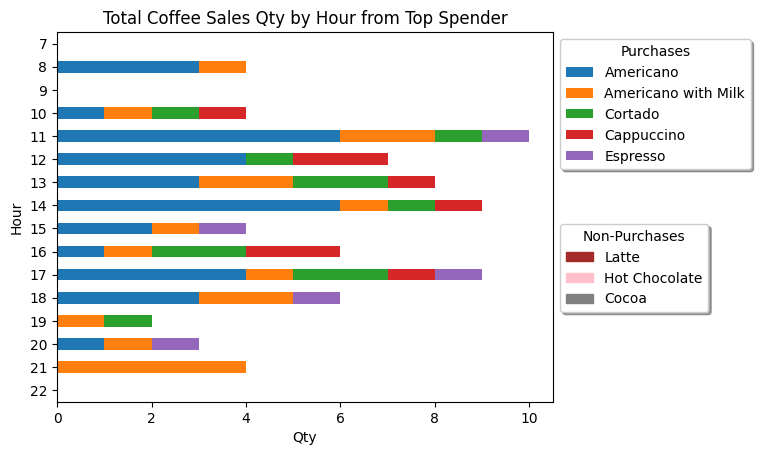

In [40]:
coffee_name_df.sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.title('Total Coffee Sales Qty by Hour from Top Spender')
plt.xlabel('Qty')
plt.ylabel('Hour')
legend1 = plt.legend([s for s in coffee_sales_df.coffee_name.unique() if s not in coffee_name_df],title='Non-Purchases',bbox_to_anchor=(1,0.5),shadow=True)
legend1.legend_handles[0].set_color('brown')
legend1.legend_handles[1].set_color('pink')
legend1.legend_handles[2].set_color('grey')
plt.gca().add_artist(legend1)
plt.legend(title='Purchases',bbox_to_anchor=(1,1),shadow=True)
plt.savefig('Total_Coffee_Sales_Qty_by_Hour_TopSpender.png',bbox_inches='tight')
plt.show()

In [41]:
coffee_sales_df

,date,datetime,cash_type,card,UAH,coffee_name,nearestHour,week,dayOfWeek
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,9,Fri
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,9,Fri
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,9,Fri
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,9,Fri
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,9,Fri
...,...,...,...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte,21,26,Sat
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte,10,26,Sun
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso,13,26,Sun
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate,16,26,Sun
